In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('train(RandomForest).csv')

In [3]:
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [5]:
df.isna().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['defects'].value_counts()

defects
False    78699
True     23064
Name: count, dtype: int64

## Seperate X and Y features

In [18]:
X = df.drop(columns=['id','defects'])
Y =df[['defects']]

In [19]:
X.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0


In [20]:
Y.head()

,defects
0,False
1,False
2,False
3,True
4,False


## We only have continious features as independent features

## Create Pipeline for preprocessing

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [25]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [26]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [28]:
x_pre = num_pipe.fit_transform(X)
x_pre

array([[-0.28108282, -0.31549702, -0.39838633, ..., -0.18776212,
        -0.24060855, -0.33578367],
       [-0.42760261, -0.44206622, -0.39838633, ..., -0.37908167,
        -0.35219708, -0.47455019],
       [-0.48254753, -0.44206622, -0.39838633, ..., -0.2834219 ,
        -0.31035138, -0.47455019],
       ...,
       [-0.20782293, -0.56863542, -0.39838633, ..., -0.06340441,
        -0.15691715, -0.61331671],
       [-0.50086251, -0.44206622, -0.39838633, ..., -0.32168581,
        -0.28245425, -0.47455019],
       [ 1.80682418,  1.583041  ,  3.27233773, ...,  0.9984191 ,
         1.33557943,  1.74571413]])

In [29]:
cols = num_pipe.get_feature_names_out()
cols

array(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b',
       't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
       'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'],
      dtype=object)

In [31]:
x_pre = pd.DataFrame(x_pre, columns=cols)
x_pre.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,-0.281083,-0.315497,-0.398386,-0.270814,-0.214179,-0.204323,-0.515843,0.416261,-0.582895,-0.080835,...,-0.085032,-0.150553,-0.131124,-0.466893,-0.19682,0.608024,-0.365180,-0.187762,-0.240609,-0.335784
1,-0.427603,-0.442066,-0.398386,-0.270814,-0.377782,-0.304545,0.283395,-0.473180,-0.282763,-0.104512,...,-0.110448,-0.306233,-0.300547,-0.466893,-0.19682,-0.132770,-0.254463,-0.379082,-0.352197,-0.474550
2,-0.482548,-0.442066,-0.398386,-0.270814,-0.301824,-0.268048,-0.016319,-0.398824,-0.210574,-0.100223,...,-0.105844,-0.384072,-0.300547,-0.466893,-0.19682,0.015389,-0.254463,-0.283422,-0.310351,-0.474550
3,-0.537492,-0.568635,-0.398386,-0.451499,-0.430368,-0.349603,0.782918,-0.597106,-0.424954,-0.106942,...,-0.113057,-0.487858,-0.300547,-0.310211,-0.19682,-0.577246,-0.531254,-0.398214,-0.449837,-0.613317
4,-0.482548,-0.442066,-0.398386,-0.270814,-0.465426,-0.375627,0.683014,-0.570197,-0.662084,-0.107508,...,-0.113665,-0.410019,-0.300547,-0.310211,-0.19682,-0.725405,-0.531254,-0.455609,-0.407991,-0.474550


## Apply train test Split

In [37]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, Y, test_size=0.2, random_state=27)

In [38]:
xtrain.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
86560,-0.555807,-0.568635,-0.398386,-0.451499,-0.494641,-0.390916,2.181584,-0.756441,-0.600833,-0.108774,...,-0.115023,-0.461912,-0.300547,-0.623576,-0.19682,-0.873564,-0.586613,-0.484307,-0.477734,-0.613317
82136,0.085217,0.570487,-0.398386,0.993976,0.393488,0.243620,-0.715652,0.793707,0.246624,0.000280,...,0.002041,0.316484,-0.300547,-0.153528,-0.19682,0.608024,0.188402,0.328801,0.303386,0.635582
94493,-0.299398,-0.315497,-0.398386,-0.270814,-0.354410,-0.299154,-0.016319,-0.278437,-0.479642,-0.101377,...,-0.107084,-0.202446,-0.300547,0.003155,-0.19682,0.163548,-0.420538,-0.331252,-0.366146,-0.335784
99786,-0.299398,-0.188928,0.033464,-0.270814,-0.220022,-0.201648,-0.216129,-0.180004,-0.203136,-0.093051,...,-0.098150,-0.202446,-0.300547,-0.153528,-0.19682,0.608024,-0.088389,-0.187762,-0.240609,-0.197017
22674,-0.445918,-0.188928,0.033464,-0.451499,-0.389468,-0.325138,-0.116224,-0.267815,-0.667772,-0.103095,...,-0.108926,-0.332179,-0.300547,-0.466893,-0.19682,-0.132770,-0.475896,-0.388648,-0.338249,-0.197017


In [39]:
xtrain.shape

(81410, 21)

In [40]:
xtest.shape

(20353, 21)

In [41]:
ytest.shape

(20353, 1)

## Creating a random forest classification model

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model =RandomForestClassifier(n_estimators=1, max_depth=2, min_samples_split=2, min_samples_leaf=2, criterion='gini')
model.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=2, min_samples_leaf=2, n_estimators=1)

In [47]:
model.score(xtrain, ytrain)

0.7947672276133153

In [48]:
model.score(xtest, ytest)

0.7964427848474427

## Hyperparameter tuning with randomized search cv

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [77]:
params = {'n_estimators':[10,50,100,150,200,250],
          'max_depth':[6,7,8,9,10,11],
          'min_samples_split':[6,7,8,9,10,11],
          'criterion':['gini', 'entropy']}

In [78]:
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [6, 7, 8, 9, 10, 11],
                                        'min_samples_split': [6, 7, 8, 9, 10,
                                                              11],
                                        'n_estimators': [10, 50, 100, 150, 200,
                                                         250]},
                   scoring='f1_macro')

In [79]:
rscv.best_score_

0.6855453495095215

In [80]:
rscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=9,
                       n_estimators=250)

In [81]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=9,
                       n_estimators=250)

In [82]:
best_rfc.score(xtrain, ytrain)

0.8232158211521926

In [83]:
best_rfc.score(xtest, ytest)

0.8168820321328552

## Predict result for train and test

In [84]:
ypred_tr = best_rfc.predict(xtrain)
ypred_ts = best_rfc.predict(xtest)

In [85]:
ypred_tr[0:5]

array([False, False, False, False, False])

In [87]:
ytrain.head()

,defects
86560,False
82136,True
94493,False
99786,False
22674,False


In [88]:
ypred_ts[0:5]

array([ True, False, False, False,  True])

In [90]:
ytest.head()

,defects
36951,False
10614,False
22756,False
13650,False
37157,True


## Create a confusion metrix for test result

In [91]:
best_rfc.classes_

array([False,  True])

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

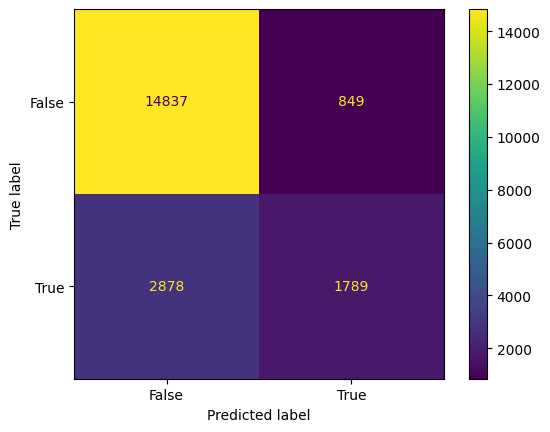

In [93]:
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_rfc.classes_)
cfd.plot()

In [94]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

       False       0.84      0.95      0.89     15686
        True       0.68      0.38      0.49      4667

    accuracy                           0.82     20353
   macro avg       0.76      0.66      0.69     20353
weighted avg       0.80      0.82      0.80     20353



In [95]:
yprob_tr = best_rfc.predict_proba(xtrain)
yprob_ts = best_rfc.predict_proba(xtest)

In [98]:
best_rfc.classes_

array([False,  True])

In [96]:
yprob_tr[0:5]

array([[0.92961283, 0.07038717],
       [0.71179047, 0.28820953],
       [0.88368277, 0.11631723],
       [0.88562464, 0.11437536],
       [0.94228381, 0.05771619]])

In [97]:
ytest.head()

,defects
36951,False
10614,False
22756,False
13650,False
37157,True


In [99]:
imp = best_rfc.feature_importances_
imp

array([0.2327228 , 0.08232385, 0.00647034, 0.06259812, 0.04382944,
       0.05555309, 0.08252899, 0.01435662, 0.0151265 , 0.02018148,
       0.04383399, 0.02219952, 0.07300669, 0.00699   , 0.03161512,
       0.00323828, 0.01464372, 0.03302715, 0.05080574, 0.02936148,
       0.0755871 ])

In [100]:
imp = pd.Series(imp)
imp

0     0.232723
1     0.082324
2     0.006470
3     0.062598
4     0.043829
5     0.055553
6     0.082529
7     0.014357
8     0.015127
9     0.020181
10    0.043834
11    0.022200
12    0.073007
13    0.006990
14    0.031615
15    0.003238
16    0.014644
17    0.033027
18    0.050806
19    0.029361
20    0.075587
dtype: float64

In [101]:
imp.index = xtrain.columns
imp

loc                  0.232723
v(g)                 0.082324
ev(g)                0.006470
iv(g)                0.062598
n                    0.043829
v                    0.055553
l                    0.082529
d                    0.014357
i                    0.015127
e                    0.020181
b                    0.043834
t                    0.022200
lOCode               0.073007
lOComment            0.006990
lOBlank              0.031615
locCodeAndComment    0.003238
uniq_Op              0.014644
uniq_Opnd            0.033027
total_Op             0.050806
total_Opnd           0.029361
branchCount          0.075587
dtype: float64

In [103]:
imp = imp.sort_values(ascending=False)
imp

loc                  0.232723
l                    0.082529
v(g)                 0.082324
branchCount          0.075587
lOCode               0.073007
iv(g)                0.062598
v                    0.055553
total_Op             0.050806
b                    0.043834
n                    0.043829
uniq_Opnd            0.033027
lOBlank              0.031615
total_Opnd           0.029361
t                    0.022200
e                    0.020181
i                    0.015127
uniq_Op              0.014644
d                    0.014357
lOComment            0.006990
ev(g)                0.006470
locCodeAndComment    0.003238
dtype: float64

<Axes: title={'center': 'features importance'}>

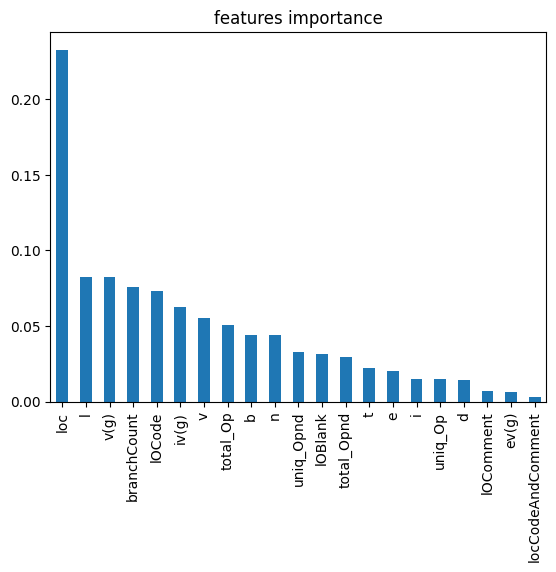

In [104]:
imp.plot(kind='bar', title=('features importance'))

## Predicting out of sample data

In [105]:
xnew = pd.read_csv('test(RandomForest).csv')
xnew.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


In [106]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67842 entries, 0 to 67841
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 67842 non-null  int64  
 1   loc                67842 non-null  float64
 2   v(g)               67842 non-null  float64
 3   ev(g)              67842 non-null  float64
 4   iv(g)              67842 non-null  float64
 5   n                  67842 non-null  float64
 6   v                  67842 non-null  float64
 7   l                  67842 non-null  float64
 8   d                  67842 non-null  float64
 9   i                  67842 non-null  float64
 10  e                  67842 non-null  float64
 11  b                  67842 non-null  float64
 12  t                  67842 non-null  float64
 13  lOCode             67842 non-null  int64  
 14  lOComment          67842 non-null  int64  
 15  lOBlank            67842 non-null  int64  
 16  locCodeAndComment  678

In [107]:
xnew.isna().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
dtype: int64

In [108]:
xnew.duplicated().sum()

0

In [112]:
xnew = xnew.drop(columns=['id'])

In [114]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

array([[-0.07961811, -0.06235862, -0.39838633, ...,  0.28097078,
         0.24759126, -0.05825063],
       [-0.18950796,  0.31734899,  1.11308828, ...,  0.11834916,
         0.13600274,  0.35804893],
       [ 1.69693433,  0.69705659,  0.89716334, ...,  2.63420126,
         2.85597314,  0.77434849],
       ...,
       [-0.24445288, -0.44206622, -0.39838633, ..., -0.20689408,
        -0.29640282, -0.47455019],
       [-0.35434272, -0.44206622, -0.39838633, ..., -0.27385592,
        -0.24060855, -0.47455019],
       [ 1.1658001 ,  1.20333339,  1.54493817, ..., -0.55126927,
        -0.54747701,  1.32941457]])

In [116]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,-0.079618,-0.062359,-0.398386,0.090554,0.276629,0.225482,-0.715652,0.940294,0.108371,0.009357,...,0.011786,0.186751,-0.300547,-0.153528,-0.19682,1.348818,0.409835,0.280971,0.247591,-0.058251
1,-0.189508,0.317349,1.113088,-0.270814,0.165613,0.084955,-0.715652,0.647119,-0.015444,-0.033432,...,-0.034146,0.005126,-0.300547,-0.310211,-0.19682,0.904342,0.188402,0.118349,0.136003,0.358049
2,1.696934,0.697057,0.897163,1.174660,2.619653,2.591405,-0.915462,2.440871,1.688656,0.500112,...,0.538591,1.977061,1.224261,2.040030,0.80428,2.089612,2.070581,2.634201,2.855973,0.774348
3,0.506461,0.190780,-0.398386,0.632607,0.346744,0.249790,-0.515843,0.251261,0.976390,-0.024758,...,-0.024835,0.575949,1.054837,0.943251,-0.19682,0.459865,0.575910,0.290537,0.289437,0.219282
4,-0.281083,-0.315497,-0.398386,-0.090130,-0.260923,-0.235965,-0.116224,-0.289060,-0.038195,-0.095655,...,-0.100941,-0.176500,-0.300547,0.003155,-0.19682,0.015389,-0.033031,-0.264290,-0.212711,-0.335784


In [117]:
pred = best_rfc.predict(xnew_pre)
pred

array([False, False,  True, ..., False, False,  True])

In [118]:
prob = best_rfc.predict_proba(xnew_pre)
prob

array([[0.74974313, 0.25025687],
       [0.78013815, 0.21986185],
       [0.35721584, 0.64278416],
       ...,
       [0.83309413, 0.16690587],
       [0.89621786, 0.10378214],
       [0.26874122, 0.73125878]])

In [119]:
import numpy as np
prob_max = np.max(prob, axis=1)
prob_max

array([0.74974313, 0.78013815, 0.64278416, ..., 0.83309413, 0.89621786,
       0.73125878])

In [120]:
xnew['defects_pred'] = pred
xnew['defects_prob'] = prob_max

In [121]:
xnew.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects_pred,defects_prob
0,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,22636.74,...,0,3,0,21.0,23.0,87.0,57.0,9.0,False,0.749743
1,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,14482.46,...,0,2,0,18.0,19.0,70.0,49.0,15.0,False,0.780138
2,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,116160.08,...,9,17,1,26.0,53.0,333.0,244.0,21.0,True,0.642784
3,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,16135.47,...,8,10,0,15.0,26.0,88.0,60.0,13.0,False,0.521952
4,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,2624.49,...,0,4,0,12.0,15.0,30.0,24.0,5.0,False,0.861829


<Axes: title={'center': 'countplot for defects prediction'}, xlabel='defects_pred'>

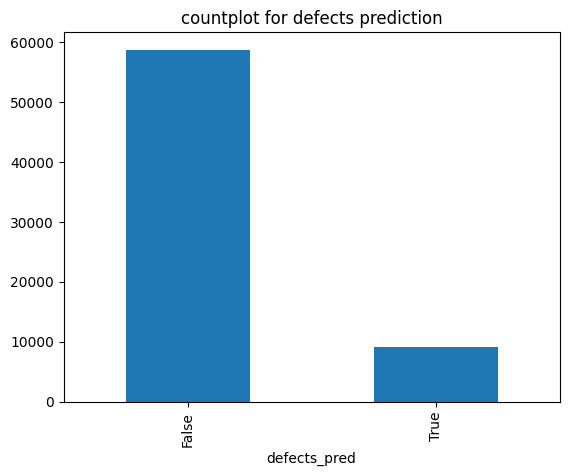

In [122]:
xnew['defects_pred'].value_counts().plot(kind='bar', title=('countplot for defects prediction'))

In [123]:
xnew.to_csv('Test_Result.csv', index=False)